29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - accuracy: 0.7595 - loss: 0.6805 - val_accuracy: 0.8482 - val_loss: 0.4163
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8526 - loss: 0.4056 - val_accuracy: 0.8555 - val_loss: 0.4055
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8657 - loss: 0.3712 - val_accuracy: 0.8637 - val_loss: 0.3745
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8723 - loss: 0.3493 - val_accuracy: 0.8619 - val_loss: 0.3776
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8754 - loss: 0.3312 - val_accuracy: 0.8766 - val_loss: 0.3458
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8815 - loss: 0.3207 - val_accuracy: 0.8708 - val_loss: 0.3516
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8856 - loss: 0.3092 - val_accuracy: 0.8666 - val_loss: 0.3691
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8888 - loss: 0.

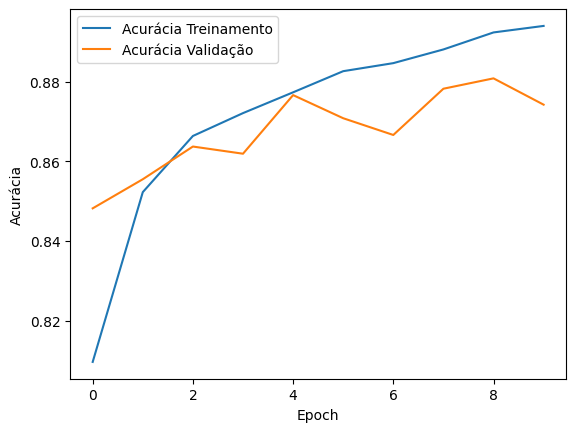

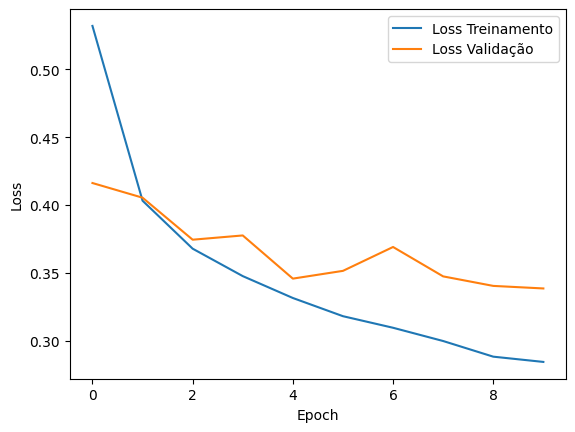

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[785   1  24  53   6   0 125   0   6   0]
 [  0 973   1  18   3   0   4   0   1   0]
 [  9   1 720   9 174   0  87   0   0   0]
 [  9  15  10 906  27   0  29   0   4   0]
 [  0   0  55  35 867   0  43   0   0   0]
 [  0   0   0   1   0 947   0  32   1  19]
 [106   1  74  40 126   0 648   0   5   0]
 [  0   0   0   0   0   9   0 973   1  17]
 [  7   0   2   4   7   2   5   3 970   0]
 [  0   0   0   1   0   3   1  42   0 953]]


              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1000
           1       0.98      0.97      0.98      1000
           2       0.81      0.72      0.76      1000
           3       0.85      0.91      0.88      1000
           4       0.72      0.87      0.78      1000
           5       0.99      0.95      0.97      1000
           6       0.69      0.65      0.67      1000
           7       0.93      0.97      0.95      1000
           8       0.98      0.97      0.98      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
import tensorflow as tf

# Carregando dataset Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Normalizando os dados
train_images, test_images = train_images / 255.0, test_images / 255.0

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

import matplotlib.pyplot as plt

# Plotando acurácia e loss
plt.plot(history.history['accuracy'], label='Acurácia Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.xlabel('Epoch')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Loss Treinamento')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

predictions = model.predict(test_images)
predictions = np.argmax(predictions, axis=1)

print(confusion_matrix(test_labels, predictions))
print(classification_report(test_labels, predictions))

# Salvando o modelo
model.save('fashion_mnist_model.h5')

# Carregando o modelo e fazendo predição
new_model = tf.keras.models.load_model('fashion_mnist_model.h5')
new_predictions = new_model.predict(test_images)


In [5]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#para fazer predições:

# Carregando o modelo salvo
new_model = tf.keras.models.load_model('fashion_mnist_model.h5')

# Fazendo predições com o modelo carregado
new_predictions = new_model.predict(test_images)

# Convertendo as predições em classes
new_predictions_labels = np.argmax(new_predictions, axis=1)

# Exibindo a matriz de confusão e o F1 Score para as novas predições
new_conf_matrix = confusion_matrix(test_labels, new_predictions_labels)
new_f1 = f1_score(test_labels, new_predictions_labels, average='weighted')

print(new_conf_matrix)
print(f"Novo F1 Score: {new_f1}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[785   1  24  53   6   0 125   0   6   0]
 [  0 973   1  18   3   0   4   0   1   0]
 [  9   1 720   9 174   0  87   0   0   0]
 [  9  15  10 906  27   0  29   0   4   0]
 [  0   0  55  35 867   0  43   0   0   0]
 [  0   0   0   1   0 947   0  32   1  19]
 [106   1  74  40 126   0 648   0   5   0]
 [  0   0   0   0   0   9   0 973   1  17]
 [  7   0   2   4   7   2   5   3 970   0]
 [  0   0   0   1   0   3   1  42   0 953]]
Novo F1 Score: 0.8738163519143475


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Matriz de Confusão:
[[785   1  24  53   6   0 125   0   6   0]
 [  0 973   1  18   3   0   4   0   1   0]
 [  9   1 720   9 174   0  87   0   0   0]
 [  9  15  10 906  27   0  29   0   4   0]
 [  0   0  55  35 867   0  43   0   0   0]
 [  0   0   0   1   0 947   0  32   1  19]
 [106   1  74  40 126   0 648   0   5   0]
 [  0   0   0   0   0   9   0 973   1  17]
 [  7   0   2   4   7   2   5   3 970   0]
 [  0   0   0   1   0   3   1  42   0 953]]
F1 Score: 0.8738163519143475
Relatório de Classificação:
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.79      0.82      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.81      0.72      0.76      1000
       Dress       0.85      0.91      0.88      1000
        Coat       0.72      0.87      0.78      1000
      Sandal       0.99      0.95      0.97      1000
       Shirt       0.69      0.65      0.67      1000
     Sneaker      

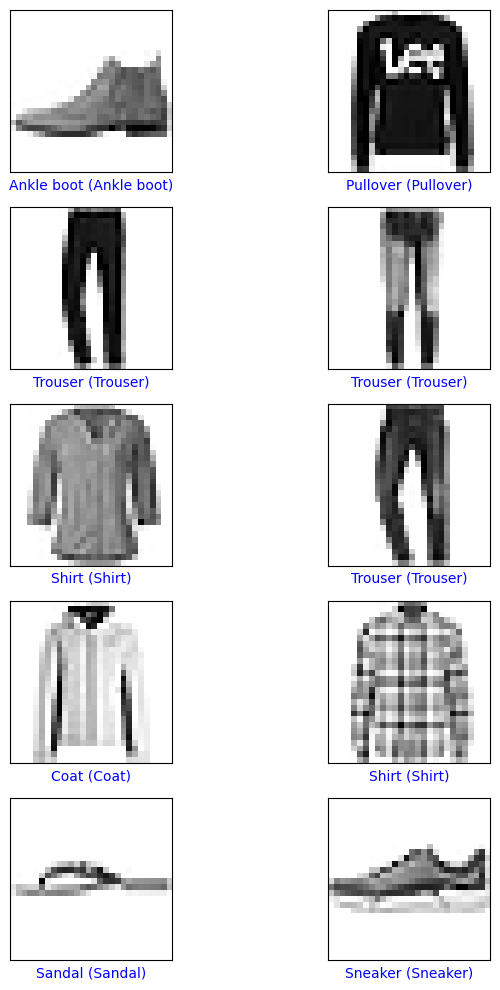

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, classification_report

# Carregar o modelo salvo
model = tf.keras.models.load_model('fashion_mnist_model.h5')

# Carregar o dataset Fashion MNIST (mesmo usado no treino)
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalizar os dados
test_images = test_images / 255.0

# Fazer previsões nos dados de teste
predictions = model.predict(test_images)

# Converter previsões para classes
predicted_labels = np.argmax(predictions, axis=1)

# Mostrar matriz de confusão
conf_matrix = confusion_matrix(test_labels, predicted_labels)
print(f"Matriz de Confusão:\n{conf_matrix}")

# Calcular F1 Score
f1 = f1_score(test_labels, predicted_labels, average='weighted')
print(f"F1 Score: {f1}")

# Exibir um relatório de classificação
report = classification_report(test_labels, predicted_labels, target_names=[
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
])
print(f"Relatório de Classificação:\n{report}")

# Mostrar algumas previsões
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)

# Mostrar 10 imagens e suas predições
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_rows = 5
num_cols = 2
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plot_image(i, predictions, test_labels, test_images)
plt.tight_layout()
plt.show()